In [30]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data
FILEPATH = 'Online retail.xlsx'
dataframes = pd.read_excel(FILEPATH, sheet_name=None)

# Display the first few rows of the dataframe to understand its structure
first_sheet_name = list(dataframes.keys())[0]
df = dataframes[first_sheet_name]
print('Data loaded from sheet:', first_sheet_name)
print(df.head())

Data loaded from sheet: Sheet1
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...             

In [31]:
# Convert the transaction data into a list of lists
transactions = df.iloc[:,0].apply(lambda x: x.split(','))

# Instantiate the TransactionEncoder
encoder = TransactionEncoder()
transaction_array = encoder.fit(transactions).transform(transactions)

# Convert the array back to a DataFrame
transaction_df = pd.DataFrame(transaction_array, columns=encoder.columns_)

# Display the transformed DataFrame
print('Transformed DataFrame:')
print(transaction_df.head())

Transformed DataFrame:
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Display the frequent itemsets and the first few association rules
print('Frequent Itemsets:')
print(frequent_itemsets.head())
print('\
Association Rules:')
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)
Association Rules:
   antecedents      consequents  antecedent support  consequent support  \
0    (avocado)  (mineral water)            0.033200            0.238267   
1       (cake)        (burgers)            0.081067            0.087200   
2    (burgers)           (cake)            0.087200            0.081067   
3  (chocolate)        (burgers)            0.163867            0.087200   
4    (burgers)      (chocolate)            0.087200            0.163867   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011467    0.345382  1.449559  0.003556    1.163629       0.320785  
1  0.011467    0.141447  1.622103  0.004398    1.063185       0.417349  
2  0.011467    0.131498  1.622103  0.004398    1.058068       0.420154  
3  0.017067    0.104150  1.194377  0.00

In [36]:
# Adjusting the thresholds for support, confidence, and lift to extract more meaningful rules
# Setting a higher support and confidence threshold, and a minimum lift greater than 1
frequent_itemsets = apriori(transaction_df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)

# Filtering rules with a lift greater than 1.5 to focus on more significant associations
meaningful_rules = rules[rules['lift'] > 1.5]

# Display the filtered rules
print('Meaningful Association Rules:')
print(meaningful_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Meaningful Association Rules:
            antecedents      consequents  antecedent support  \
0             (burgers)           (eggs)            0.087200   
5             (chicken)  (mineral water)            0.060000   
11               (milk)      (chocolate)            0.129600   
16        (cooking oil)  (mineral water)            0.051067   
30  (frozen vegetables)           (milk)            0.095333   
31  (frozen vegetables)  (mineral water)            0.095333   
32  (frozen vegetables)      (spaghetti)            0.095333   
35        (ground beef)           (milk)            0.098267   
36        (ground beef)  (mineral water)            0.098267   
37        (ground beef)      (spaghetti)            0.098267   
38          (spaghetti)    (ground beef)            0.174133   
40      (mineral water)           (milk)            0.238267   
41               (milk)  (mineral water)            0.129600   
42          (spaghetti)           (milk)            0.174133   
43        

In [44]:
meaningful_rules_df = pd.DataFrame(meaningful_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
meaningful_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
5,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
11,(milk),(chocolate),0.129600,0.163867,0.032133,0.247942,1.513074,0.010896,1.111794,0.389584
16,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,0.007966,1.257517,0.416947
30,(frozen vegetables),(milk),0.095333,0.129600,0.023600,0.247552,1.910127,0.011245,1.156758,0.526685
31,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
32,(frozen vegetables),(spaghetti),0.095333,0.174133,0.027867,0.292308,1.678643,0.011266,1.166986,0.446884
35,(ground beef),(milk),0.098267,0.129600,0.022000,0.223881,1.727474,0.009265,1.121477,0.467012
36,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
37,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
meaningful_rules_df['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
meaningful_rules_df.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
meaningful_rules_df['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(meaningful_rules_df['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(meaningful_rules_df, x='antecedent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(meaningful_rules_df['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(meaningful_rules_df, x='consequent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(meaningful_rules_df['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(meaningful_rules_df, x='support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(meaningful_rules_df['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(meaningful_rules_df, x='confidence', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_ex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


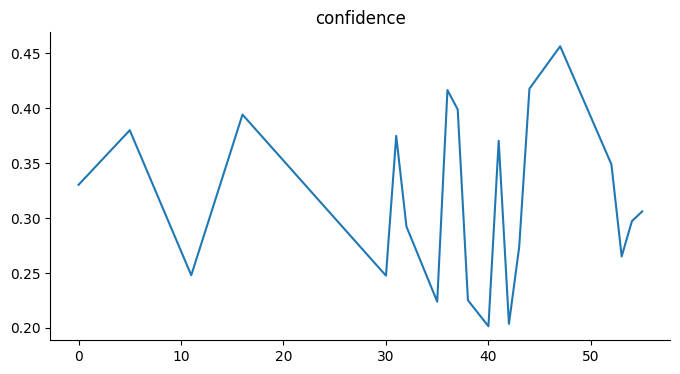

In [51]:
from matplotlib import pyplot as plt
meaningful_rules_df['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


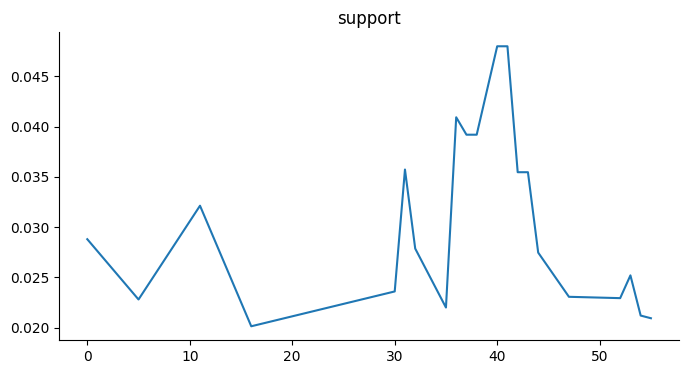

In [50]:
from matplotlib import pyplot as plt
meaningful_rules_df['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


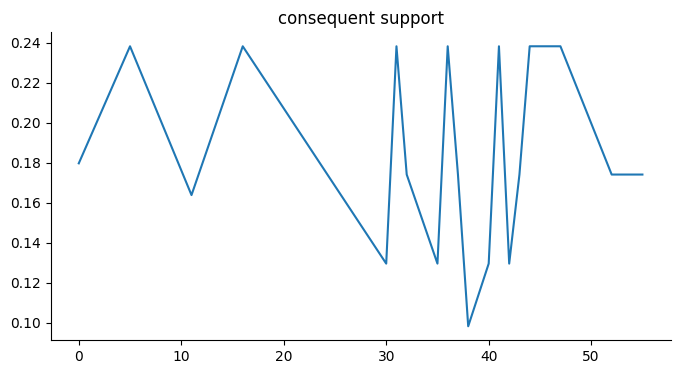

In [49]:
from matplotlib import pyplot as plt
meaningful_rules_df['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


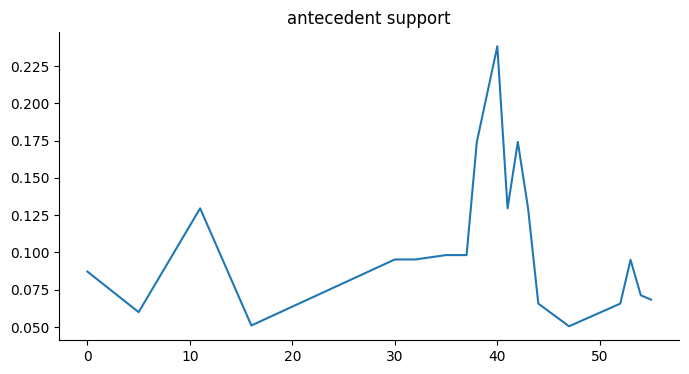

In [48]:
from matplotlib import pyplot as plt
meaningful_rules_df['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


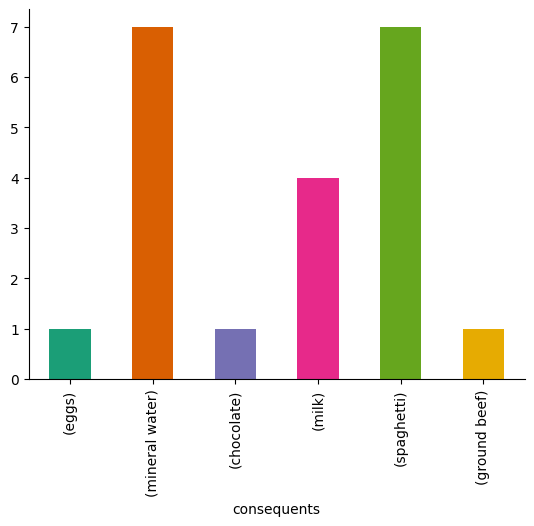

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
meaningful_rules_df.groupby('consequents').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)